# Linear models
* Linear regression
* Ridge
* Lasso
* LAD regression
* Huber regression
* Linear SVM

## Load data

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

In [2]:
bestiaries.head()

,level,book,str,dex,con,int,wis,cha,ac,hp,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
0,8,Pathfinder #164: Hands of the Devil,5.0,5.0,3.0,-2.0,3.0,4.0,28.0,152,...,0,0,0,0,0,0,0,0,0,0
1,5,Pathfinder #163: Ruins of Gauntlight,5.0,2.0,4.0,4.0,2.0,2.0,22.0,75,...,0,0,0,0,0,0,0,0,0,0
2,3,Pathfinder #163: Ruins of Gauntlight,4.0,3.0,1.0,1.0,3.0,1.0,18.0,48,...,0,0,0,0,0,0,0,0,0,0
3,3,Pathfinder #164: Hands of the Devil,1.0,4.0,1.0,0.0,3.0,1.0,20.0,30,...,5,0,0,0,0,0,0,0,0,0
4,8,Pathfinder #164: Hands of the Devil,5.0,5.0,5.0,2.0,4.0,5.0,27.0,120,...,10,0,0,0,0,0,0,0,0,0


In [3]:
bestiaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4506
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   level                   3833 non-null   int64  
 1   book                    3833 non-null   object 
 2   str                     3833 non-null   float64
 3   dex                     3833 non-null   float64
 4   con                     3833 non-null   float64
 5   int                     3833 non-null   float64
 6   wis                     3833 non-null   float64
 7   cha                     3833 non-null   float64
 8   ac                      3833 non-null   float64
 9   hp                      3833 non-null   int32  
 10  perception              3833 non-null   float64
 11  fortitude               3833 non-null   float64
 12  reflex                  3833 non-null   float64
 13  will                    3833 non-null   float64
 14  focus                   3833 non-null   

Scale data using MinMaxScaler

In [4]:
columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [5]:
bestiaries.shape

(3833, 52)

In [6]:
bestiaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4506
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   str                     3833 non-null   float64
 1   dex                     3833 non-null   float64
 2   con                     3833 non-null   float64
 3   int                     3833 non-null   float64
 4   wis                     3833 non-null   float64
 5   cha                     3833 non-null   float64
 6   ac                      3833 non-null   float64
 7   hp                      3833 non-null   float64
 8   perception              3833 non-null   float64
 9   fortitude               3833 non-null   float64
 10  reflex                  3833 non-null   float64
 11  will                    3833 non-null   float64
 12  focus                   3833 non-null   float64
 13  num_immunities          3833 non-null   float64
 14  land_speed              3833 non-null   

## Filter: get only bestiaries

In [7]:
import os
from training.splitting_dataset import split_dataframe, get_date_books_mapping


os.chdir("../../training")
books_dates_map = get_date_books_mapping()
os.chdir("../notebooks/models")

In [8]:
books_to_include = [
    book for _, row in books_dates_map["books"].iteritems() for book in row
]
bestiaries = bestiaries[bestiaries["book"].isin(books_to_include)]

In [9]:
os.chdir("../../training")
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [10]:
X_train.size + X_test.size

81550

In [11]:
bestiaries[
    bestiaries["book"].str.contains("#", regex=False)
].size  # Adventure Paths have '#' in book/title

0

In [12]:
bestiaries.book.value_counts()

Pathfinder Bestiary                                    467
Pathfinder Bestiary 2                                  373
Pathfinder Bestiary 3                                  365
Pathfinder Kingmaker                                   181
Pathfinder Book of the Dead                             91
Pathfinder Gamemastery Guide                            83
Pathfinder Beginner Box                                 62
Pathfinder Abomination Vaults Hardcover Compilation      8
Pathfinder Player Core                                   1
Name: book, dtype: int64

In [13]:
X_test.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
651,0.588235,0.470588,0.428571,0.000000,0.411765,0.176471,0.452830,0.148581,0.104348,0.340426,...,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
652,0.000000,0.705882,0.357143,0.666667,0.588235,0.705882,0.547170,0.290484,0.191304,0.382979,...,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
656,0.411765,0.588235,0.285714,0.400000,0.411765,0.588235,0.396226,0.081803,0.095652,0.191489,...,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
657,0.588235,0.647059,0.428571,0.533333,0.411765,0.529412,0.490566,0.207012,0.139130,0.340426,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
659,0.647059,0.470588,0.428571,0.466667,0.647059,0.588235,0.490566,0.273790,0.156522,0.297872,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


##### Linear SVM

In [14]:
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVR


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
clf_linear_svr.fit(X_train, y_train)

y_pred = clf_linear_svr.predict(X_test)

C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mean_absolute_error(y_test, y_pred)

0.44090527191307155

In [16]:
mean_squared_error(y_test, y_pred)

0.5313162325534099

In [17]:
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from training.constants import RANDOM_STATE


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]}

model = GridSearchCV(
    estimator=clf_linear_svr,
    param_grid=hyper_params,
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)

In [18]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0,
                               10000.0, 100000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [19]:
model.best_params_

{'C': 1}

In [20]:
import numpy as np


clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": np.linspace(0.1, 100, num=1000)}

model = RandomizedSearchCV(
    estimator=clf_linear_svr,
    param_distributions=hyper_params,
    scoring="neg_mean_absolute_error",
    cv=folds,
    verbose=2,
    return_train_score=True,
    n_iter=100,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

In [21]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LinearSVR(max_iter=10000, random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4....
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,  97.2,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. ])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [22]:
model.best_params_

{'C': 13.700000000000001}

In [23]:
clf_linear_svr = LinearSVR(loss="epsilon_insensitive", max_iter=10000, random_state=0)
folds = KFold(n_splits=5, shuffle=True, random_state=0)
hyper_params = {"C": np.linspace(10, 30, num=20)}

model = GridSearchCV(
    estimator=clf_linear_svr,
    param_grid=hyper_params,
    scoring="neg_mean_absolute_error",
    cv=folds,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LinearSVR(max_iter=10000, random_state=0), n_jobs=-1,
             param_grid={'C': array([10.        , 11.05263158, 12.10526316, 13.15789474, 14.21052632,
       15.26315789, 16.31578947, 17.36842105, 18.42105263, 19.47368421,
       20.52631579, 21.57894737, 22.63157895, 23.68421053, 24.73684211,
       25.78947368, 26.84210526, 27.89473684, 28.94736842, 30.        ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [26]:
model.best_params_

{'C': 16.315789473684212}

In [27]:
y_pred = model.predict(X_test)

mean_absolute_error(y_test, y_pred)

0.43926036503851135

In [28]:
mean_squared_error(y_test, y_pred)

0.5036503988431489

In [16]:
from training.train_and_evaluate_models import train_and_evaluate_models


results = train_and_evaluate_models(
    [
        "linear_regression",
        "linear_regression_ridge",
        "linear_regression_lasso",
        "lad_regression",
        "huber_regression",
        "linear_svm",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[[0.05 * i for i in range(1, 20)], [0.05 * i for i in range(5, 16)]],
)

[I 2024-05-23 21:02:52,258] A new study created in memory with name: no-name-8b636623-4c9a-4729-8fac-6023f46d342d
[I 2024-05-23 21:02:52,268] Trial 0 finished with value: 0.3576158940397351 and parameters: {'level_-1': 0.5484441254274971, 'level_0': 0.44732053225465396, 'level_1': 0.08681896438818032, 'level_2': 0.28834151559730004, 'level_3': 0.33524214270531816, 'level_4': 0.8478144077434031, 'level_5': 0.3573672281458699, 'level_6': 0.915415952028504, 'level_7': 0.8134693302992893, 'level_8': 0.6856248737199147, 'level_9': 0.4219909293862231, 'level_10': 0.14191149147020785, 'level_11': 0.14015545351891792, 'level_12': 0.91190830457898, 'level_13': 0.6232543468926811, 'level_14': 0.5095555460563086, 'level_15': 0.471556451885615, 'level_16': 0.8702288447973039, 'level_17': 0.11458232961222664, 'level_18': 0.2915254721075386, 'level_19': 0.6066759341464965, 'level_20': 0.5425167616271868}. Best is trial 0 with value: 0.3576158940397351.
[I 2024-05-23 21:02:52,268] Trial 1 finished wi

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[I 2024-05-23 21:04:57,792] A new study created in memory with name: no-name-18cb7599-d265-4107-87c5-a2411205855d
[I 2024-05-23 21:04:57,885] Trial 0 finished with value: 0.340691685062546 and parameters: {'level_-1': 0.8807806065714563, 'level_0': 0.8323715293773131, 'level_1': 0.2028924893600405, 'level_2': 0.13725349764830602, 'level_3': 0.7294515161227448, 'level_4': 0.8275263757923285, 'level_5': 0.08010134748276812, 'level_6': 0.5731502304489754, 'level_7': 0.15718777568247402, 'level_8': 0.7254128673478529, 'level_9': 0.17658878173339237, 'level_10': 0.5994800752878038, 'level_11': 0.9028497347215308, 'level_12': 0.09791412189357437, 'level_13': 0.5913973402790779, 'level_14': 0.8208513035540145, 'level_15': 0.5301631266527009, 'level_16': 0.34397864706335257, 'level_17': 0.8621958598311787, 'level_18': 0.6707503621037036, 'level_19': 0.8674267343753027, 'level_20': 0.055999291728144475}. Best is trial 0 with value: 0.340691685062546.
[I 2024-05-23 21:04:57,970] Trial 1 finished

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[I 2024-05-23 21:52:13,616] A new study created in memory with name: no-name-aae0d40b-0b55-42f0-ac3a-82709ceca4b1
[I 2024-05-23 21:52:13,627] Trial 0 finished with value: 0.3789551140544518 and parameters: {'level_-1': 0.5206892916818113, 'level_0': 0.870576442260397, 'level_1': 0.11437629690761718, 'level_2': 0.8201009675616117, 'level_3': 0.9494150823210941, 'level_4': 0.0914500233917449, 'level_5': 0.7440502976057398, 'level_6': 0.5191131608415696, 'level_7': 0.890515227475304, 'level_8': 0.14305996161485648, 'level_9': 0.27189494657759544, 'level_10': 0.1936444244344634, 'level_11': 0.5642240187995532, 'level_12': 0.6937702659996432, 'level_13': 0.5398516365706167, 'level_14': 0.23071744436480862, 'level_15': 0.5502505846336925, 'level_16': 0.8262604420109484, 'level_17': 0.28922631857648046, 'level_18': 0.7693798725056161, 'level_19': 0.4255639113590616, 'level_20': 0.15683730029409365}. Best is trial 0 with value: 0.3789551140544518.
[I 2024-05-23 21:52:13,648] Trial 1 finished w

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\jolka\OneDrive\Dokumenty\mgr\Predictive-ML-in-TTRPG-game-design\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
[I 2024-05-23 21:53:08,057] A new study created in memory with name: no-name-2b58307d-1aa3-4d34-95c4-1ccadd454ced
[I 2024-05-23 21:53:08,069] Trial 0 finished with value: 0.25533480500367917 and parameters: {'level_-1': 0.06524867360322448, 'level_0': 0.755378383283264, 'level_1': 0.5209653909592115, 'level_2': 0.6201012769451245, 'level_3': 0.7541325041529927, 'level_4': 0.6299024395146771, 'level_5': 0.47599580230412686, 'level_6': 0.24609778626875112, 'level_7': 0.22496702605885227, 'level_8': 0.7540366124505259, 'level_9': 0.31596121996357013, 'level_10': 0.497261766292726, 'level_11': 0.6194416986918966, 'level_12': 0.7223625397447082, 'level_13': 0.5727352759810436, 'level_14': 0.4450455716033119,

In [17]:
from training.train_and_evaluate_models import print_results


for model_name, model in results.items():
    print_results(model_name, model)

==== linear_regression ====
	--> no_rounding
		--> train
			--> rmse: 0.500431834592485
			--> mae: 0.3501346027611697
		--> test
			--> rmse: 0.8107909242698775
			--> mae: 0.48722867454708935
	--> round 0.5
		--> train
			--> rmse: 0.48296971935727107
			--> mae: 0.21265636497424578
			--> accuracy: 0.7954378219278881
		--> test
			--> rmse: 0.7952062255644573
			--> mae: 0.38235294117647056
			--> accuracy: 0.6617647058823529
	--> best_single_threshold_0.05_0.95
		--> threshold
			--> 0.45
		--> train
			--> rmse: 0.47991291827200916
			--> mae: 0.21118469462840322
			--> accuracy: 0.7961736571008095
		--> test
			--> rmse: 0.7998161553463028
			--> mae: 0.3897058823529412
			--> accuracy: 0.6544117647058824
	--> best_multiple_thresholds_0.05_0.95
		--> thresholds
			--> -1: 0.8899210618387814
			--> 0: 0.7173812949265542
			--> 1: 0.601717280757395
			--> 2: 0.48970374083596757
			--> 3: 0.46996588437487546
			--> 4: 0.36972524478199664
			--> 5: 0.3166629598762236
			--> 6: 0.4259

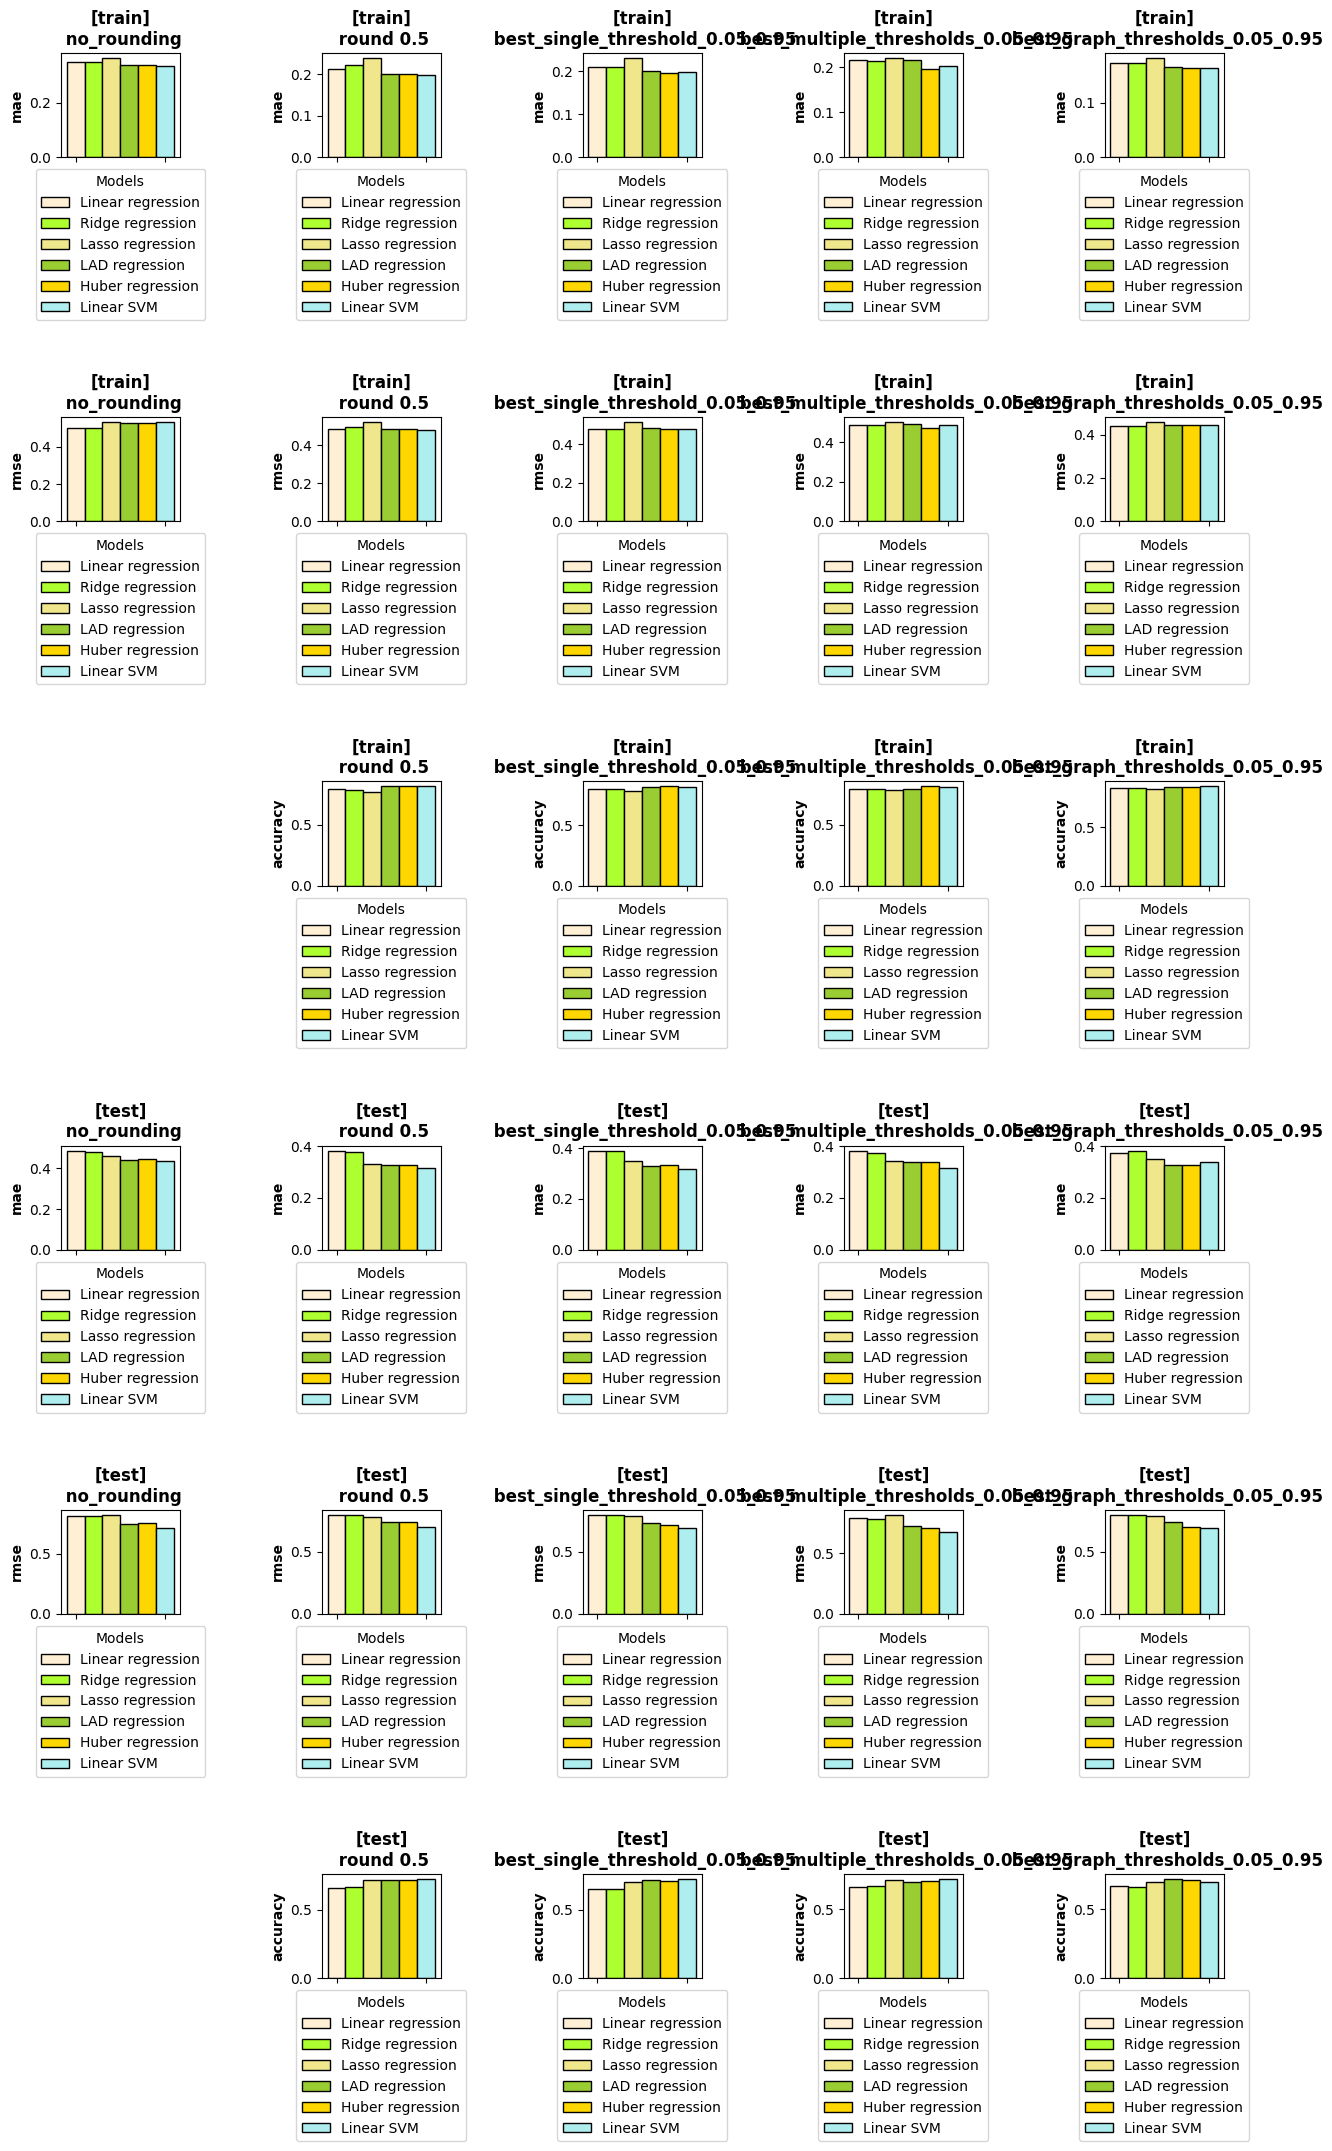

In [20]:
from training.results import plot_results

plot_results(
    results,
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(15, 25),
    sets=[
        "train",
        "test",
    ],
    rounding_types=[
        "no_rounding",
        "round 0.5",
        "best_single_threshold_0.05_0.95",
        "best_multiple_thresholds_0.05_0.95",
        "best_graph_thresholds_0.05_0.95",
        # "best_single_threshold_0.25_0.75",
        # "best_multiple_thresholds_0.25_0.75",
        # "best_graph_thresholds_0.25_0.75",
    ],
    hspace=2.5,
    wspace=1.2,
)

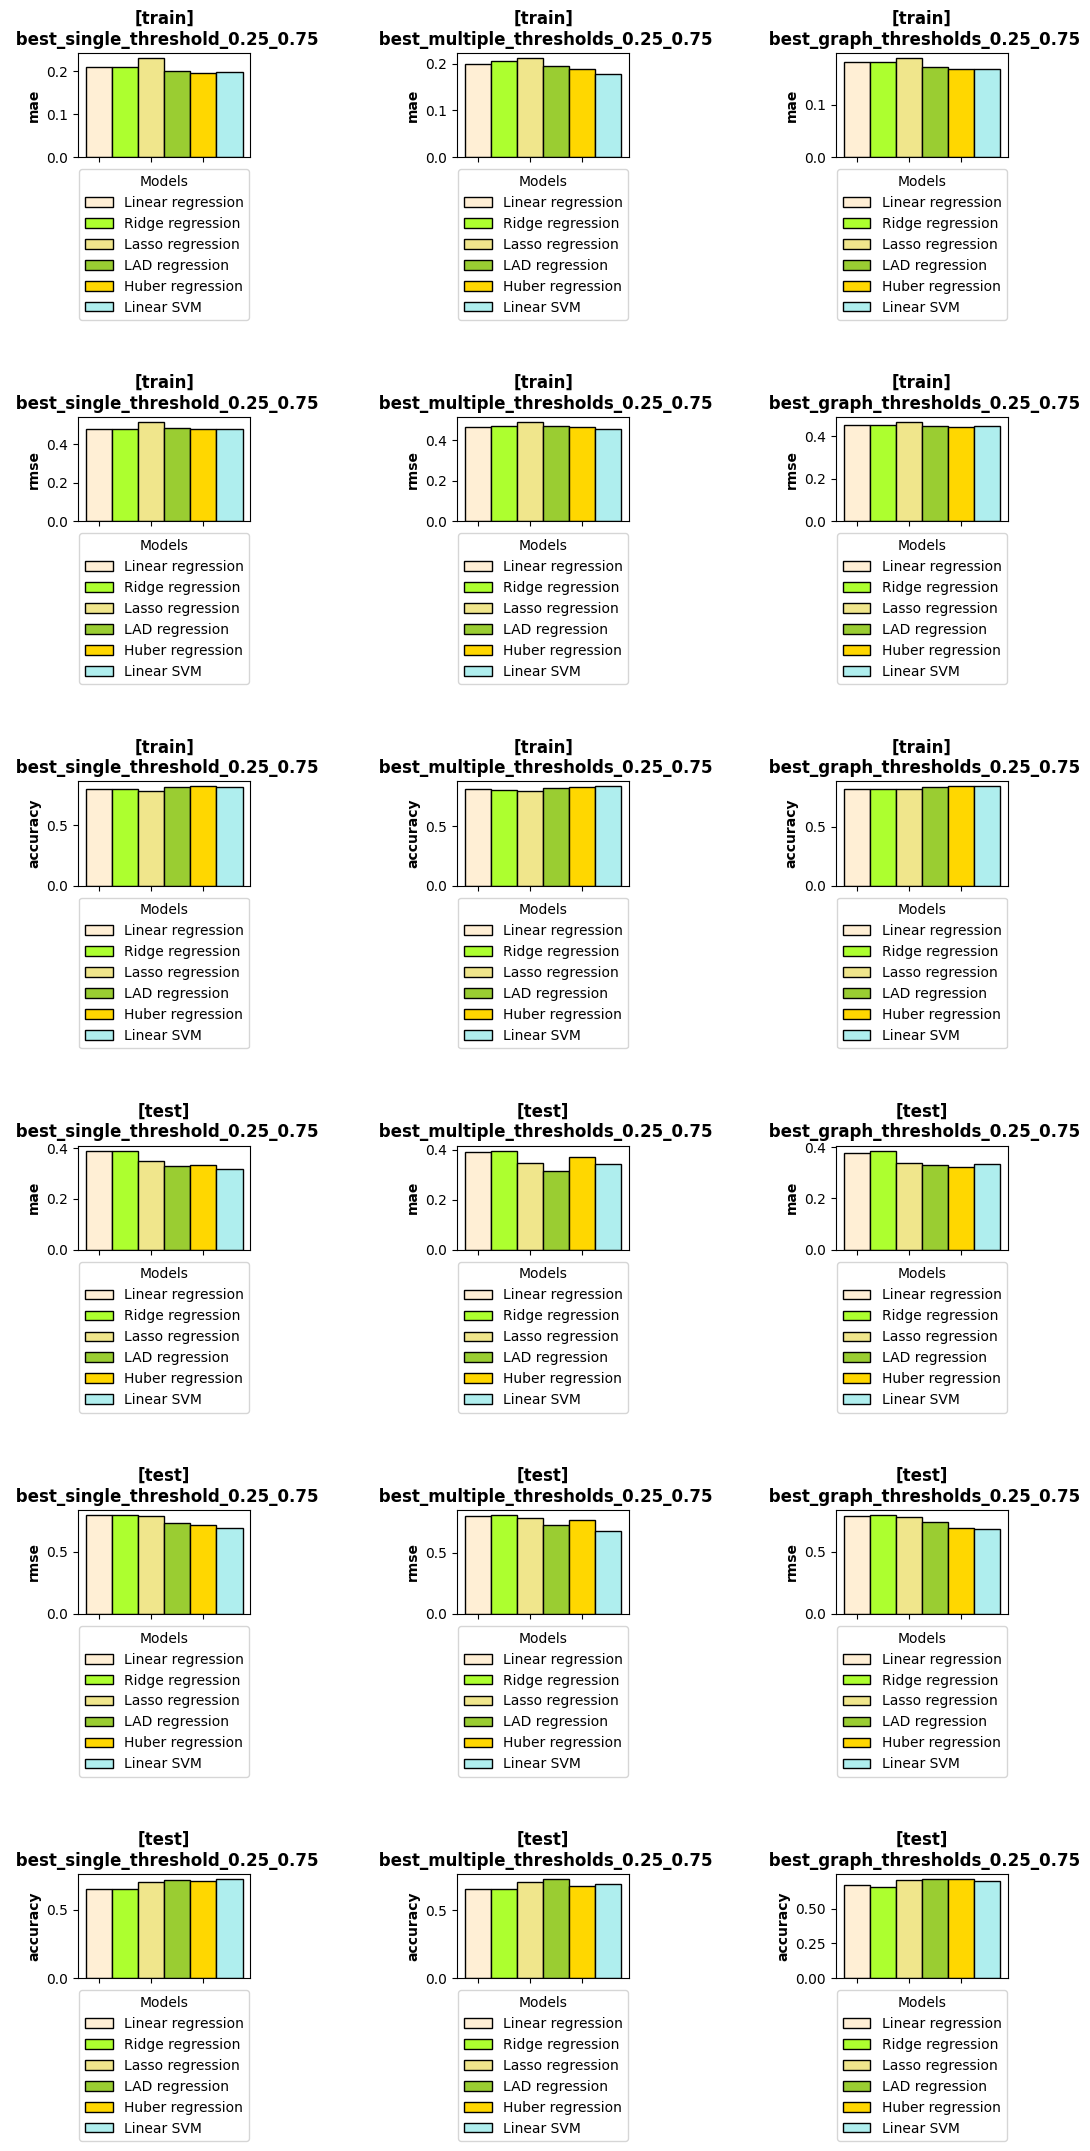

In [23]:
plot_results(
    results,
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(12, 25),
    sets=[
        "train",
        "test",
    ],
    rounding_types=[
        # "no_rounding",
        # "round 0.5",
        # "best_single_threshold_0.05_0.95",
        # "best_multiple_thresholds_0.05_0.95",
        # "best_graph_thresholds_0.05_0.95",
        "best_single_threshold_0.25_0.75",
        "best_multiple_thresholds_0.25_0.75",
        "best_graph_thresholds_0.25_0.75",
    ],
    hspace=2.5,
    wspace=1.2,
)

In [ ]:
results

In [ ]:
from training.train_and_evaluate_models import evaluate_models


results2 = evaluate_models(
    {model_name: values["model"] for model_name, values in results.items()},
    X_train,
    y_train,
    X_test,
    y_test,
    thresholds=[0.05 * i for i in range(5, 16)],
    print_summary=True,
)

In [ ]:
for model_name, model in results2.items():
    print_results(model_name, model)

In [ ]:
plot_results(
    results2,
    measure_types=["mae", "rmse", "accuracy"],
    figsize=(10, 25),
    sets=[
        "train",
        "test",
    ],
    rounding_types=[
        "no_rounding",
        "round 0.5",
        "best_single_threshold",
        "best_multiple_thresholds",
        "best_graph_thresholds",
    ],
    hspace=2.5,
    wspace=1.2,
)

## AOO

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data, min_max_scale_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES],
    FEATURES + ["aoo"],
)

bestiaries = min_max_scale_data(bestiaries)
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

NameError: name 'get_aoo' is not defined